In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Cleaning & Wrangling

In [26]:
data = pd.read_csv("/content/Algerian_forest_fires_dataset_UPDATE.csv",header = 1)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [27]:
# missing values
data.isnull().sum()

,0
day,0
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [28]:
data[data.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [29]:
data.loc[:121,"Region"] = 0
data.loc[122:,"Region"] = 1
data["Region"] = data["Region"].astype(int)
data.isna().sum()

,0
day,0
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [30]:
data.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [31]:
data = data.drop(122)
data = data.drop(123)
data[data.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [32]:
data.dropna(inplace = True)
data.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [33]:
data = data.reset_index(drop = True)
data.iloc[120:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1
126,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1
127,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1
128,07,06,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire,1
129,08,06,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire,1


In [34]:
data.columns = data.columns.str.strip()
data.columns = data.columns.str.upper()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DAY          243 non-null    object
 1   MONTH        243 non-null    object
 2   YEAR         243 non-null    object
 3   TEMPERATURE  243 non-null    object
 4   RH           243 non-null    object
 5   WS           243 non-null    object
 6   RAIN         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  CLASSES      243 non-null    object
 14  REGION       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [35]:
# updating column datatypes
int_cols = ["DAY","MONTH","YEAR"]
data[int_cols]= data[int_cols].astype(int)
data[data.columns[3:13]] = data[data.columns[3:13]].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DAY          243 non-null    int64  
 1   MONTH        243 non-null    int64  
 2   YEAR         243 non-null    int64  
 3   TEMPERATURE  243 non-null    float64
 4   RH           243 non-null    float64
 5   WS           243 non-null    float64
 6   RAIN         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  CLASSES      243 non-null    object 
 14  REGION       243 non-null    int64  
dtypes: float64(10), int64(4), object(1)
memory usage: 28.6+ KB


In [36]:
data.describe()

,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,REGION
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [37]:
data["CLASSES"] = data["CLASSES"].str.strip()
data["CLASSES"].drop_duplicates()

,CLASSES
0,not fire
5,fire


In [38]:
df = data.copy()
df.head()

,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,REGION
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [39]:
df.loc[data["CLASSES"]=="not fire","CLASSES_NUM"] = 0
df.loc[data["CLASSES"]=="fire","CLASSES_NUM"] = 1
df.head()

,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,REGION,CLASSES_NUM
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0.0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0.0
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0.0
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0.0
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0.0


In [40]:
df[["CLASSES","CLASSES_NUM"]].drop_duplicates()

,CLASSES,CLASSES_NUM
0,not fire,0.0
5,fire,1.0


In [41]:
df.to_csv("algeria_cleaned.csv",index = False)

#Exploratory Data Analysis

In [42]:
df1 = df.copy()
df1 = df1.drop(["DAY","MONTH","YEAR"],axis = 1)
df1.head()

,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,REGION,CLASSES_NUM
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0.0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0.0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0.0


array([[<Axes: title={'center': 'TEMPERATURE'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'WS'}>],
       [<Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'REGION'}>,
        <Axes: title={'center': 'CLASSES_NUM'}>]], dtype=object)

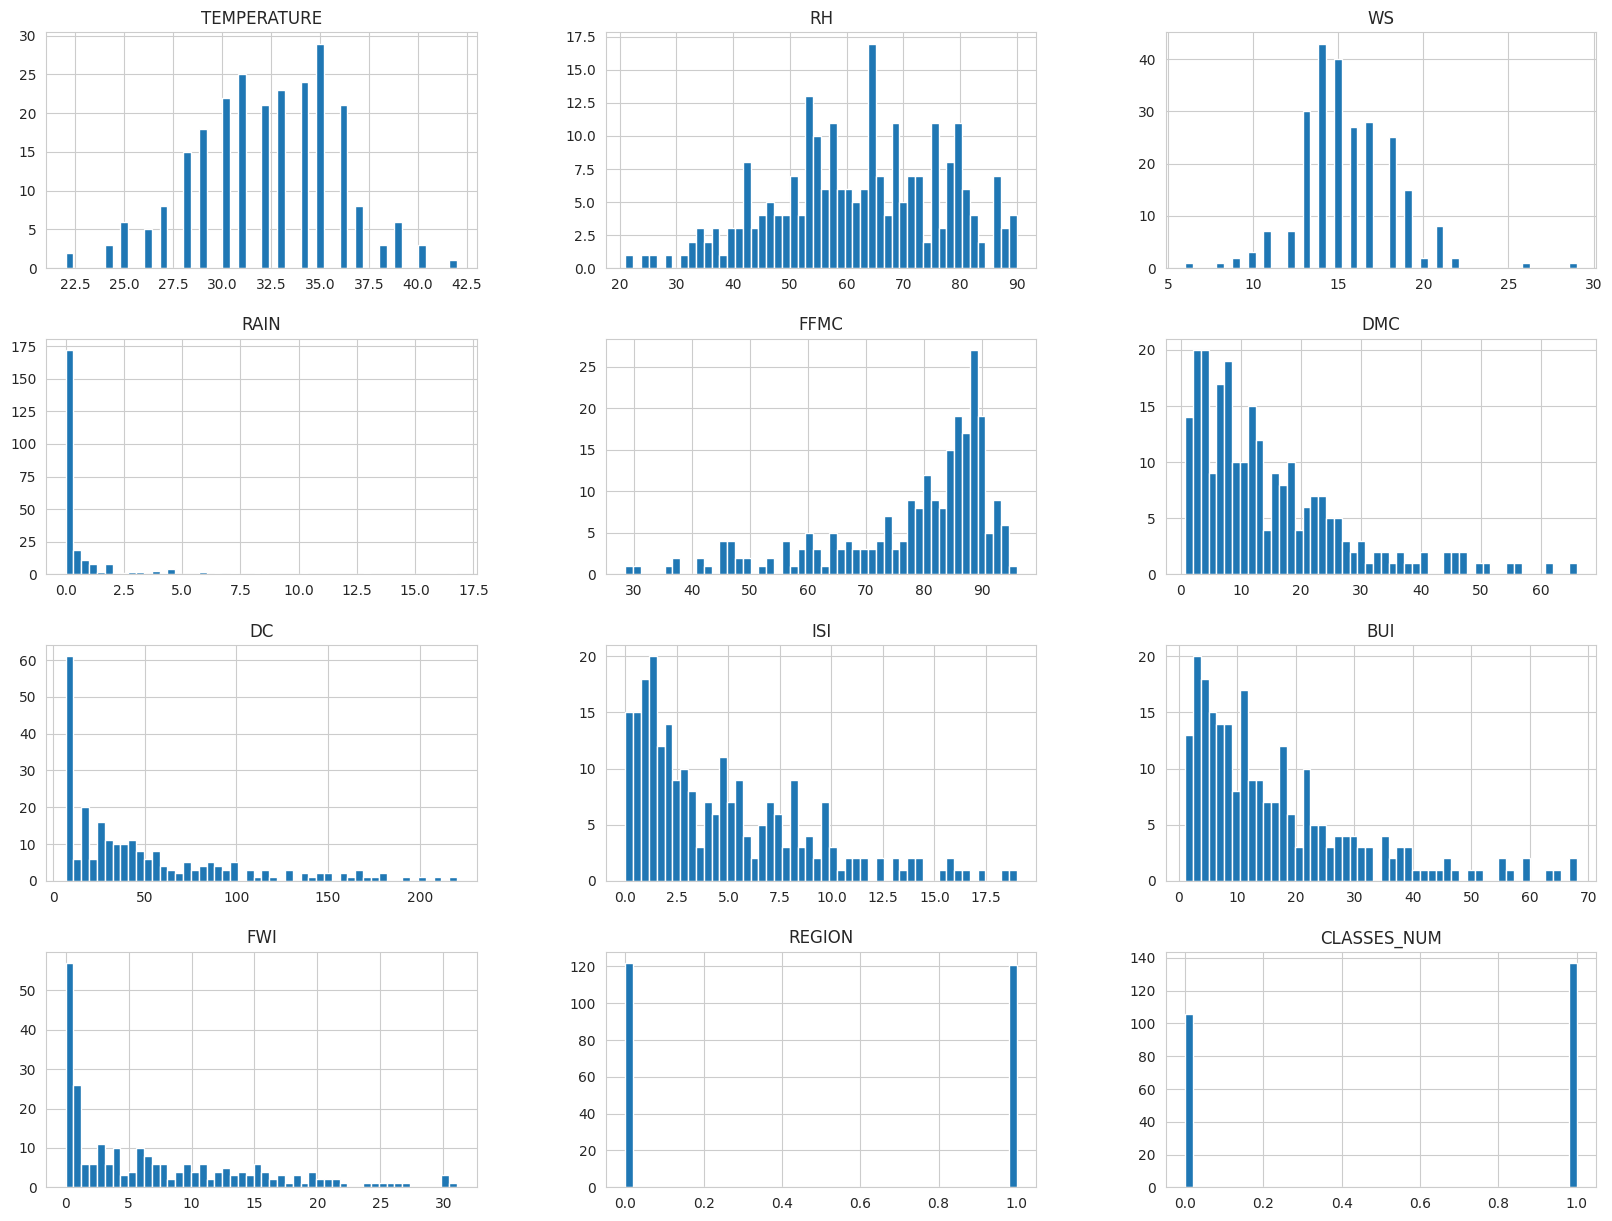

In [43]:
sns.set_style("whitegrid")
df1.hist(bins = 50,figsize = (20,15))

In [44]:
percentage = df1["CLASSES"].value_counts(normalize = True) #normalize gives percentages
percentage

,proportion
CLASSES,
fire,0.563786
not fire,0.436214


([<matplotlib.patches.Wedge at 0x7a8ec860b7a0>,
 [Text(-0.2189564657232264, 1.0779879712306597, 'Fire'),
  Text(0.21895655996393085, -1.0779879520888727, 'Not Fire')],
 [Text(-0.11943079948539621, 0.5879934388530871, '56.4%'),
  Text(0.11943085088941681, -0.5879934284121123, '43.6%')])

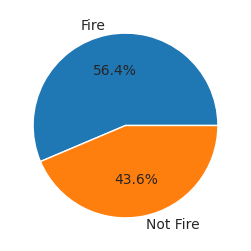

In [45]:
classlabels = ["Fire","Not Fire"]
plt.figure(figsize = (5,3))
plt.pie(percentage,labels = classlabels,autopct = "%1.1f%%")

In [46]:
df1.drop("CLASSES",axis = 1).corr()

,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,REGION,CLASSES_NUM
TEMPERATURE,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682,-0.432161
WS,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160,-0.069964
RAIN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.263197,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.089408,0.586639
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.197102,0.719216


<Axes: >

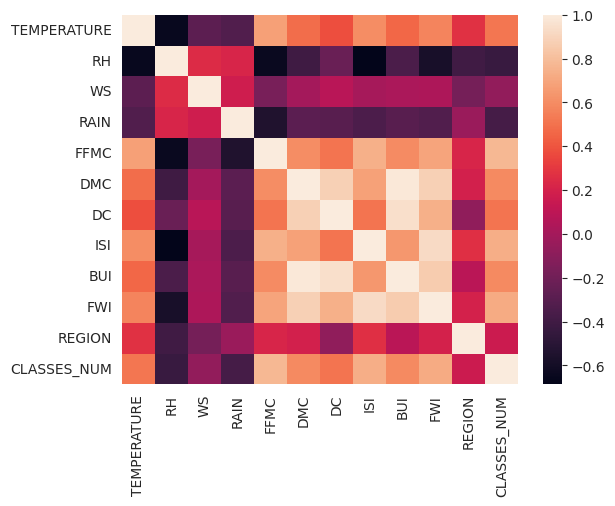

In [47]:
sns.heatmap(df1.drop("CLASSES",axis = 1).corr())

<Axes: ylabel='FWI'>

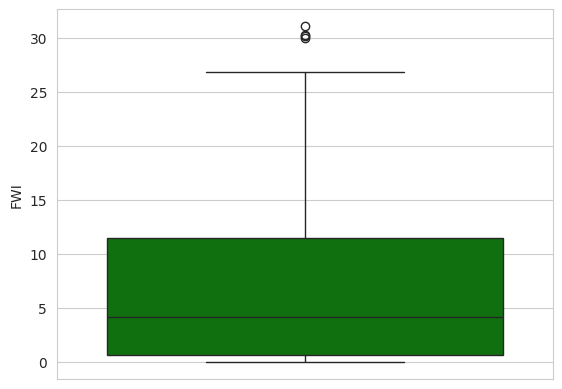

In [48]:
sns.boxplot(df1["FWI"],color = "green")

Text(0.5, 1.0, 'Fire analysis of Bejaia Region ')

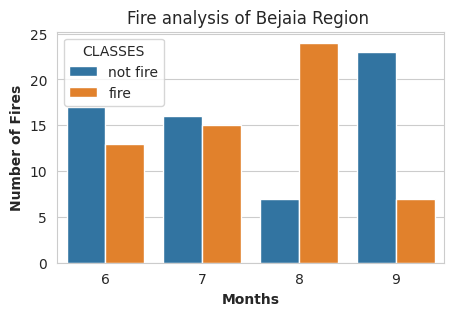

In [49]:
# monthly fire analysis
dftemp = df.loc[df["REGION"]==0]
plt.subplots(figsize = (5,3))
sns.set_style("whitegrid")
sns.countplot(x = "MONTH",hue = "CLASSES",data = dftemp)
plt.ylabel("Number of Fires",weight = 'bold')
plt.xlabel("Months",weight = "bold")
plt.title("Fire analysis of Bejaia Region ")

Text(0.5, 1.0, 'Fire analysis of Sidibel Region ')

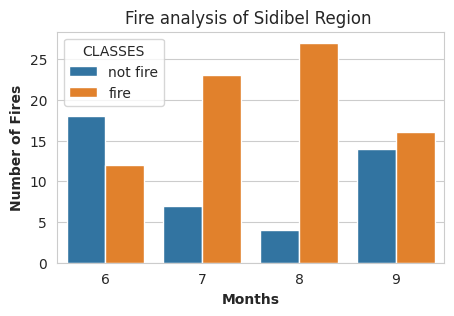

In [50]:
dftemp = df.loc[df["REGION"]==1]
plt.subplots(figsize = (5,3))
sns.set_style("whitegrid")
sns.countplot(x = "MONTH",hue = "CLASSES",data = dftemp)
plt.ylabel("Number of Fires",weight = 'bold')
plt.xlabel("Months",weight = "bold")
plt.title("Fire analysis of Sidibel Region ")

#Feature Selection , Multicollinearity

In [90]:
df = pd.read_csv("/content/algeria_cleaned.csv")
df.head()

,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,REGION,CLASSES_NUM
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0.0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0.0
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0.0
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0.0
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0.0


In [91]:
df.drop(["DAY","MONTH","YEAR"],axis = 1,inplace = True)
df.head()

,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,REGION,CLASSES_NUM
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0.0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0.0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0.0


In [103]:
df[["CLASSES","CLASSES_NUM"]].value_counts()

,,count
CLASSES,CLASSES_NUM,
fire,1.0,137
not fire,0.0,106


*Multicollinearity recap* :
1. checks for multicollinearity i.e. explanatory variables are linearly independent : correlation , variance inflation factor
2. condition number of matrix X
3. solutions to multicollinearity- drop correlated regressors, or combine them into one, regularization methods like ridge and lasso, increase sample size
4. source : https://statlect.com/fundamentals-of-statistics/multicollinearity

<Axes: >

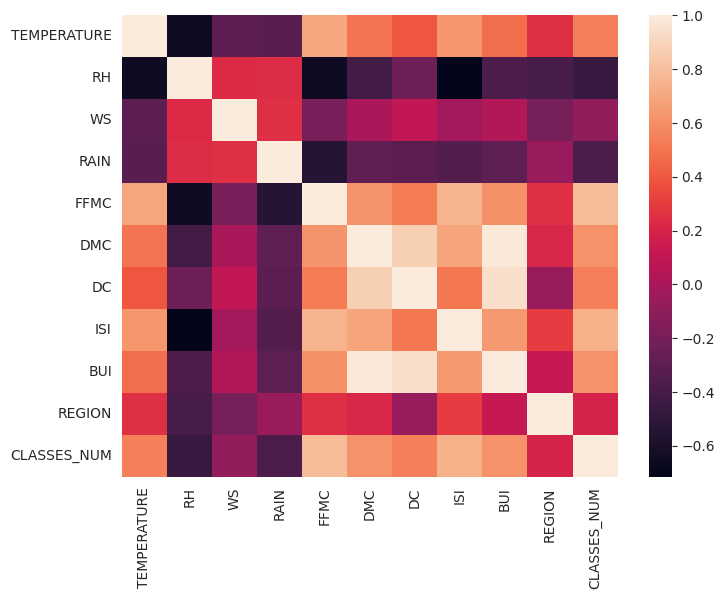

In [109]:
plt.figure(figsize = (8,6))
corr = x_train.corr()
sns.heatmap(corr)

In [112]:
(corr>0.8).sum()

,0
TEMPERATURE,1
RH,1
WS,1
RAIN,1
FFMC,1
DMC,3
DC,3
ISI,1
BUI,3
REGION,1


In [162]:
def correlated_features(data,threshold):
  """ function to identify correlated features by parsing though the upper half of matrix;
      inputs are the data(pandas dataframe) and correlation coefficient threshold;
      output is a list of correlated columns with their correlation coefficients.
  """
  correlated_columns = []
  corr_matrix = data.corr()
  n = len(corr_matrix)
  for i in range(n):
    for j in range(i+1,n):
      if corr_matrix.iloc[i,j] > threshold :
        correlated_columns.append([corr_matrix.index[i],corr_matrix.columns[j],round(float(corr_matrix.iloc[i,j]),2)])

  print(correlated_columns)

In [99]:
# dependent and independent features
x = df.drop(["CLASSES","FWI"],axis = 1)
y = df["FWI"] #series
x.head()

,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,REGION,CLASSES_NUM
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0


In [102]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(182, 11)
(182,)
(61, 11)
(61,)


In [163]:
correlated_features(x_train,0.8)

[['DMC', 'DC', 0.87], ['DMC', 'BUI', 0.98], ['DC', 'BUI', 0.94]]
